<a href="https://colab.research.google.com/github/saran2811/Task-6/blob/main/saran_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools as it

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


$\color{blue}{\text{**Task 1.
1. Find the linear regression equation for mileage vs price. **}}$

In [ ]:
x_m=df[['Mileage']]
y_m=df['Price']

In [ ]:
mil_reg=linear_model.LinearRegression().fit(x_m,y_m)
m=mil_reg.coef_[0]
c=mil_reg.intercept_

In [ ]:
print(f'Linear regression equation is (price)y = {m:.4f} * Mileage + {c:.4f}')

Linear regression equation is (price)y = -0.1725 * Mileage + 24764.5590



$\color{blue}{\text{Task1.2.Chart the original data and the equation on the chart.}}$

In [ ]:
pr_pred=mil_reg.predict(x_m)

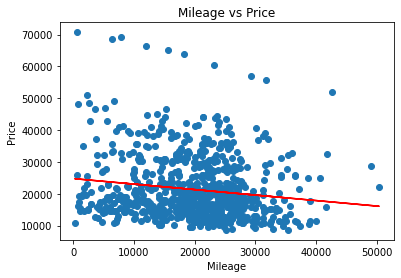

In [ ]:
plt.scatter(x_m,y_m)
plt.plot(x_m,pr_pred,color='red')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

$\color{blue}{\text{Task 1.3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the}}$$\color{blue}{\text{
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)}}$

In [ ]:
rscore=mil_reg.score(x_m,y_m)
print('R^2 score for this equation : {:.4f}'.format(rscore),'\n\n')
if rscore>=0.8:
  print('Equation is fit beacause R^2 value is above 0.8')
else:
  print('Equation is not a good fit because R^2 value is below 0.8')

R^2 score for this equation : 0.0205 


Equation is not a good fit because R^2 value is below 0.8


$\color{blue}{\text{**Task 2.1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.**}}$

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
features=['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']

In [ ]:
def reg(col,df,dep='Price',flag=0):
  ind=df[col]
  dep=df[dep]
  price_reg=linear_model.LinearRegression().fit(ind,dep)
  if flag==1:
    print("Linear regression equation :")
    for i,j in enumerate(col):
      print('({:.4f}*{}) + '.format(price_reg.coef_[i],j),end='')
    print(price_reg.intercept_)
  return price_reg


In [ ]:
price_reg=reg(features,df,flag=1)

Linear regression equation :
(-0.1697*Mileage) + (3792.3789*Cylinder) + (-787.2207*Liter) + (-1542.7458*Doors) + (6288.9971*Cruise) + (-1993.7953*Sound) + (3349.3616*Leather) + 6758.755143598106


$\color{blue}{\text{
Task 2.2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the}}$$\color{blue}{\text{
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)}}$

In [ ]:
rscore1=price_reg.score(df[features],df['Price'])
print('R^2 score for this equation : {:.4f}'.format(rscore1),'\n\n')
if rscore1>=0.8:
  print('Equation is fit beacause R^2 value is above 0.8')
else:
  print('Equation is not a good fit because R^2 value is below 0.8')

R^2 score for this equation : 0.4463 


Equation is not a good fit because R^2 value is below 0.8


$\color{blue}{\text{
Task 2.3. Find the combination of the factors that is the best predictor for price.}}$

In [ ]:
combi=[list(it.combinations(features, n + 1)) for n in range(len(features))]


In [ ]:
def reg_(col,df,dep='Price'):
  ind=df[col]
  dep=df[dep]
  price_reg=linear_model.LinearRegression().fit(ind,dep)
  return price_reg.score(ind,dep),price_reg.coef_

In [ ]:
def score(com,df):
  score={}
  for i in range(len(com)):
    for j in com[i]:
      score[j]=reg_(list(j),df)
  return score

In [ ]:
com_scores=score(combi,df)

In [ ]:
sort_price=sorted(com_scores.items(),key=lambda x:x[1],reverse=True)

In [ ]:
for i,j in sort_price:
  print(j,'-->|',i,'|')
  print('--------------------------------------------------------------------------------')

0.4462643536728379 -->| ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather') |
--------------------------------------------------------------------------------
0.44569092105870245 -->| ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather') |
--------------------------------------------------------------------------------
0.437805741536638 -->| ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather') |
--------------------------------------------------------------------------------
0.4369402151237246 -->| ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather') |
--------------------------------------------------------------------------------
0.43014148406475594 -->| ('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather') |
--------------------------------------------------------------------------------
0.43001820483252684 -->| ('Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather') |
--------------------------------------------------------------------

CONCLUSION

In [ ]:
print('Combination that is best predictor of price with maximum R^2 score is :\n')
print(sort_price[0][0],'--max R^2 score-->',sort_price[0][1])

Combination that is best predictor of price with maximum R^2 score is :

('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather') --max R^2 score--> 0.4462643536728379


$\color{blue}{\text{
**Task 3.1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.**}}$

In [ ]:
df1=df.copy()
df1.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df_make=pd.get_dummies(df['Make'])
df1[df_make.columns]=df_make
df1.drop('Make',axis=1,inplace=True)

df_Model=pd.get_dummies(df['Model'])
df1[df_Model.columns]=df_Model
df1.drop('Model',axis=1,inplace=True)

df_btype=pd.get_dummies(df['Type'])
df1[df_btype.columns]=df_btype
df1.drop('Type',axis=1,inplace=True)

In [ ]:
df1.head()

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Buick,...,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8,Convertible,Coupe,Hatchback,Sedan,Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0


**using  car Make to predict the accuracy **

In [ ]:
features_make=features+list(df_make.columns)

In [ ]:
score_make=reg_(features_make,df1)

In [ ]:
score_make

(0.8790407013784629,
 array([-1.80350637e-01, -2.15017490e+02,  4.76041802e+03, -1.71005694e+03,
        -5.03847862e+02, -4.40784379e+01,  2.54587694e+01, -4.09717439e+03,
         1.21744272e+04, -6.33451398e+03, -5.87619252e+03,  1.05422512e+04,
        -6.40879743e+03]))

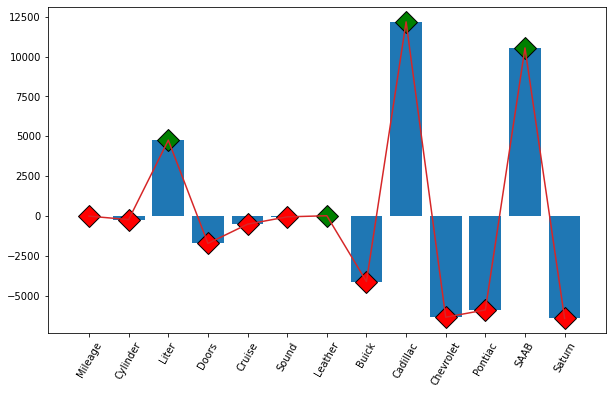

In [ ]:
fig=plt.figure(figsize=(10,6))

for x,i in zip(features_make,score_make[1]): 
  if i>=0:
      plt.plot(x,i,marker="D",ms=15,mec="k",mfc="g")
  else:
      plt.plot(x,i,marker="D",ms=15,mec="k",mfc="r")
plt.plot(features_make,score_make[1])
plt.bar(features_make,score_make[1])
plt.xticks(rotation=60)

plt.show()

Taking make in to consideration has much of influence in the accuracy score.

Cadillac, SAAB has much weightage in Make.

**Lets consider the Body type and measure accuracy**

In [ ]:
features_type=features+list(df_btype.columns)


In [ ]:
score_btype=reg_(features_type,df1)
score_btype

(0.6861037486069592,
 array([-1.85730984e-01,  3.45540842e+03,  2.13147098e+02, -2.90072741e+03,
         3.95201161e+03, -5.74584918e+02,  3.24062522e+03,  1.10063851e+04,
        -9.55602137e+03, -5.64205281e+03, -1.63418573e+03,  5.82587484e+03]))

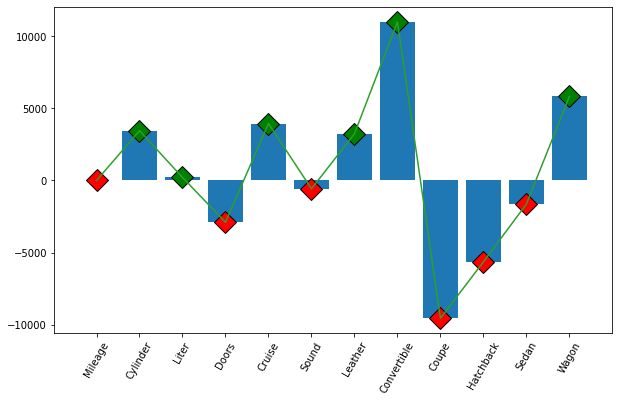

In [ ]:
fig=plt.figure(figsize=(10,6))

for x,i in zip(features_type,score_btype[1]): 
  if i>=0:
      plt.plot(x,i,marker="D",ms=15,mec="k",mfc="g")
  else:
      plt.plot(x,i,marker="D",ms=15,mec="k",mfc="r")
plt.plot(features_type,score_btype[1])
plt.bar(features_type,score_btype[1])
plt.xticks(rotation=60)

plt.show()

Taking BODYTYPE in to consideration Convertible and wagon has much of weightage in pricing

Considering accuracy score Body type has not much of influence with score less than 0.7

**Lets consider the model with make**

In [ ]:
features_Model=features_make+list(df_Model.columns)

In [ ]:
score_Mod=reg_(features_Model,df1)
score_Mod

(0.9726960036276533,
 array([-1.77363292e-01,  1.42109547e+03, -1.29503922e+03, -1.00061033e+03,
        -1.05134011e+02,  1.71299650e+02,  4.33554826e+02, -2.83605249e+03,
         1.45618708e+04, -5.16991643e+03, -4.96734012e+03,  4.53847732e+03,
        -6.12703903e+03, -2.37371207e+03,  9.24148028e+02,  1.94720905e+03,
         2.84864765e+03,  1.19218466e+03, -7.63945900e+03,  1.65913162e+03,
         6.27392361e+03, -9.75872350e+03, -6.04045824e+03, -5.79440817e+03,
        -4.15368328e+03, -4.87584245e+03,  1.83515958e+04, -3.82882021e+03,
         7.16551015e+02,  8.17023319e+03, -5.41812196e+03, -3.32097727e+02,
         1.65507234e+03, -3.78748142e+03, -2.33955761e+03,  4.91587690e+02,
        -7.22786218e+02, -2.05163298e+03, -4.15508640e+02,  3.18955421e+03,
        -1.36198272e+03,  2.64361517e+03, -7.29423286e+03, -2.46880341e+03,
         2.05938584e+04]))

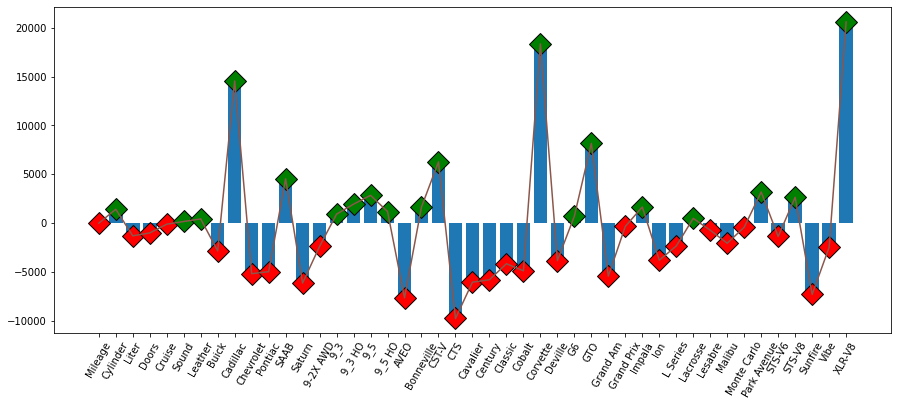

In [ ]:
fig=plt.figure(figsize=(15,6))

for x,i in zip(features_Model,score_Mod[1]): 
  if i>=0:
      plt.plot(x,i,marker="D",ms=15,mec="k",mfc="g")
  else:
      plt.plot(x,i,marker="D",ms=15,mec="k",mfc="r")
plt.plot(features_Model,score_Mod[1])
plt.bar(features_Model,score_Mod[1])
plt.xticks(rotation=60)

plt.show()

In [ ]:
df_Model.columns

Index(['9-2X AWD', '9_3', '9_3 HO', '9_5', '9_5 HO', 'AVEO', 'Bonneville',
       'CST-V', 'CTS', 'Cavalier', 'Century', 'Classic', 'Cobalt', 'Corvette',
       'Deville', 'G6', 'GTO', 'Grand Am', 'Grand Prix', 'Impala', 'Ion',
       'L Series', 'Lacrosse', 'Lesabre', 'Malibu', 'Monte Carlo',
       'Park Avenue', 'STS-V6', 'STS-V8', 'Sunfire', 'Vibe', 'XLR-V8'],
      dtype='object')

Taking Model into consideration along with the make provide best accuracy of predicting price.

In [ ]:
print(f'The r^2 score including make and model is {score_Mod[0]}')

The r^2 score including make and model is 0.9726960036276533


consider above predictions lets take all positive weighing columns and predict the acuuracy.

$\color{blue}{\text{
**Task 3.2. Find the best combination of factors to predict price.**}}$

In [ ]:
feature_all=[]
for x,i in zip(features_make,score_Mod[1]): 
  if i>=0:
    if x in feature_all:
       feature_all.append(x)
for x,i in zip(features_type,score_btype[1]): 
  if i>=0:
    if x not in feature_all:
       feature_all.append(x)
for x,i in zip(features_Model,score_Mod[1]): 
  if i>=0:
    if x not in feature_all:
       feature_all.append(x)


In [ ]:
score_com=reg_(feature_all,df1)
score_com[0]

0.9543221075754452

considering most of features the best combination with good accurscy is

In [ ]:
print('The combination to consider to predict price better is:')
print(feature_all,'\n\n')
print(f'Caculting using above fatures the accuracy is : {score_com[0]}\n\n')
print('The equation is consider to be best fit for predicting price since value is above 0.8')



The combination to consider to predict price better is:
['Cylinder', 'Liter', 'Cruise', 'Leather', 'Convertible', 'Wagon', 'Sound', 'Cadillac', 'SAAB', '9_3', '9_3 HO', '9_5', '9_5 HO', 'Bonneville', 'CST-V', 'Corvette', 'G6', 'GTO', 'Impala', 'Lacrosse', 'Park Avenue', 'STS-V8', 'XLR-V8'] 


Caculting using above fatures the accuracy is : 0.9543221075754452


The equation is consider to be best fit for predicting price since value is above 0.8
